# Introduction: 
1. In the given dataset, we need to predict satisfaction level of passenger. There are many features are available in dataset which are impacting the satisfaction level of passenger. It is very compulsory to know what is your passenger expectation in airport.To conduct this analysis we are going to analyze this data deeply to derive some meaningful insights from the data.

2. As we know we have two classes in our target so we can named this problem as **Binary Classification.**

3. And another thing as we know our target label so we also can called it is **supervised machine learning** problem.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm 


import warnings
warnings.filterwarnings('ignore')
#sns.set()
target_colors=['#8b324d','#387149']
pie_text={'fontsize': 14}

In [2]:
#read data set
df=pd.read_csv('../input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Target Analysis:

1. It is very important to know before start analyze dataset that how is your target distributed among the classes. By doing this we can know that we are going to handle the balanced or imbalanced dataset.

2. As target is univariate and we are going to perform univariate analysis for this we can draw pie and cout chart to display our data.


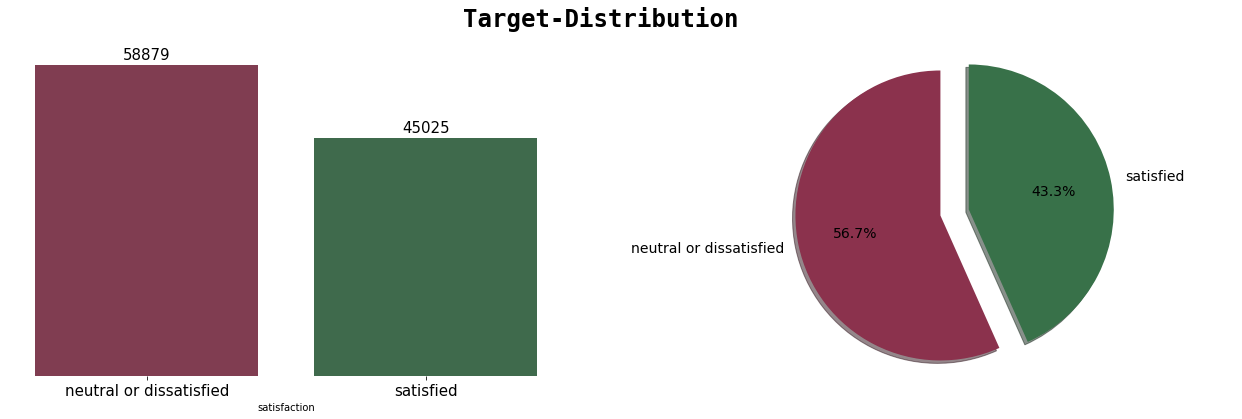

In [3]:
#define the figure
fig=plt.figure(figsize=(22,6))
#set the tilte of our analysis
plt.suptitle('Target-Distribution',fontsize=24,weight='bold',fontname = 'monospace')
#create grid to draw data in subplots and define how many rows and columns we need to display
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
#create your first figure by defining its position
ax1=fig.add_subplot(grid[0,:1])
#ax1.set_title('Bar Chart')
sns.countplot(x='satisfaction',data=df,ax=ax1,palette=target_colors)
#removing the boarder of your plot
for spine in ax1.spines.values():
    spine.set_visible(False)
    #remove the yaxis as well
ax1.get_yaxis().set_visible(False)
for index,value in enumerate(df['satisfaction'].value_counts()):
    ax1.annotate(value,xy=(index,value+2000),ha='center',va='center',fontsize=15)

ax1.set_xticklabels(df['satisfaction'].value_counts().index,fontsize=15 )
#create your second figure by defining its position
ax2=fig.add_subplot(grid[0,1:])
#for pie chart: define the label and its values
labels = df['satisfaction'].value_counts().index
sizes =df['satisfaction'].value_counts().values
#if you want to take out slice from your pizza then define explode based on the classed
explode=(0,0.2)
#draw pie chart finally, but make sure you first deine the values and then label
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = target_colors,textprops=pie_text)
#make all the axis equal in pie chart
ax2.axis('equal')
plt.show()

**Inference:**

We can see that data is not completely balanced. But it's okay for this stage to move ahead with analysis.

# Passenger Profile

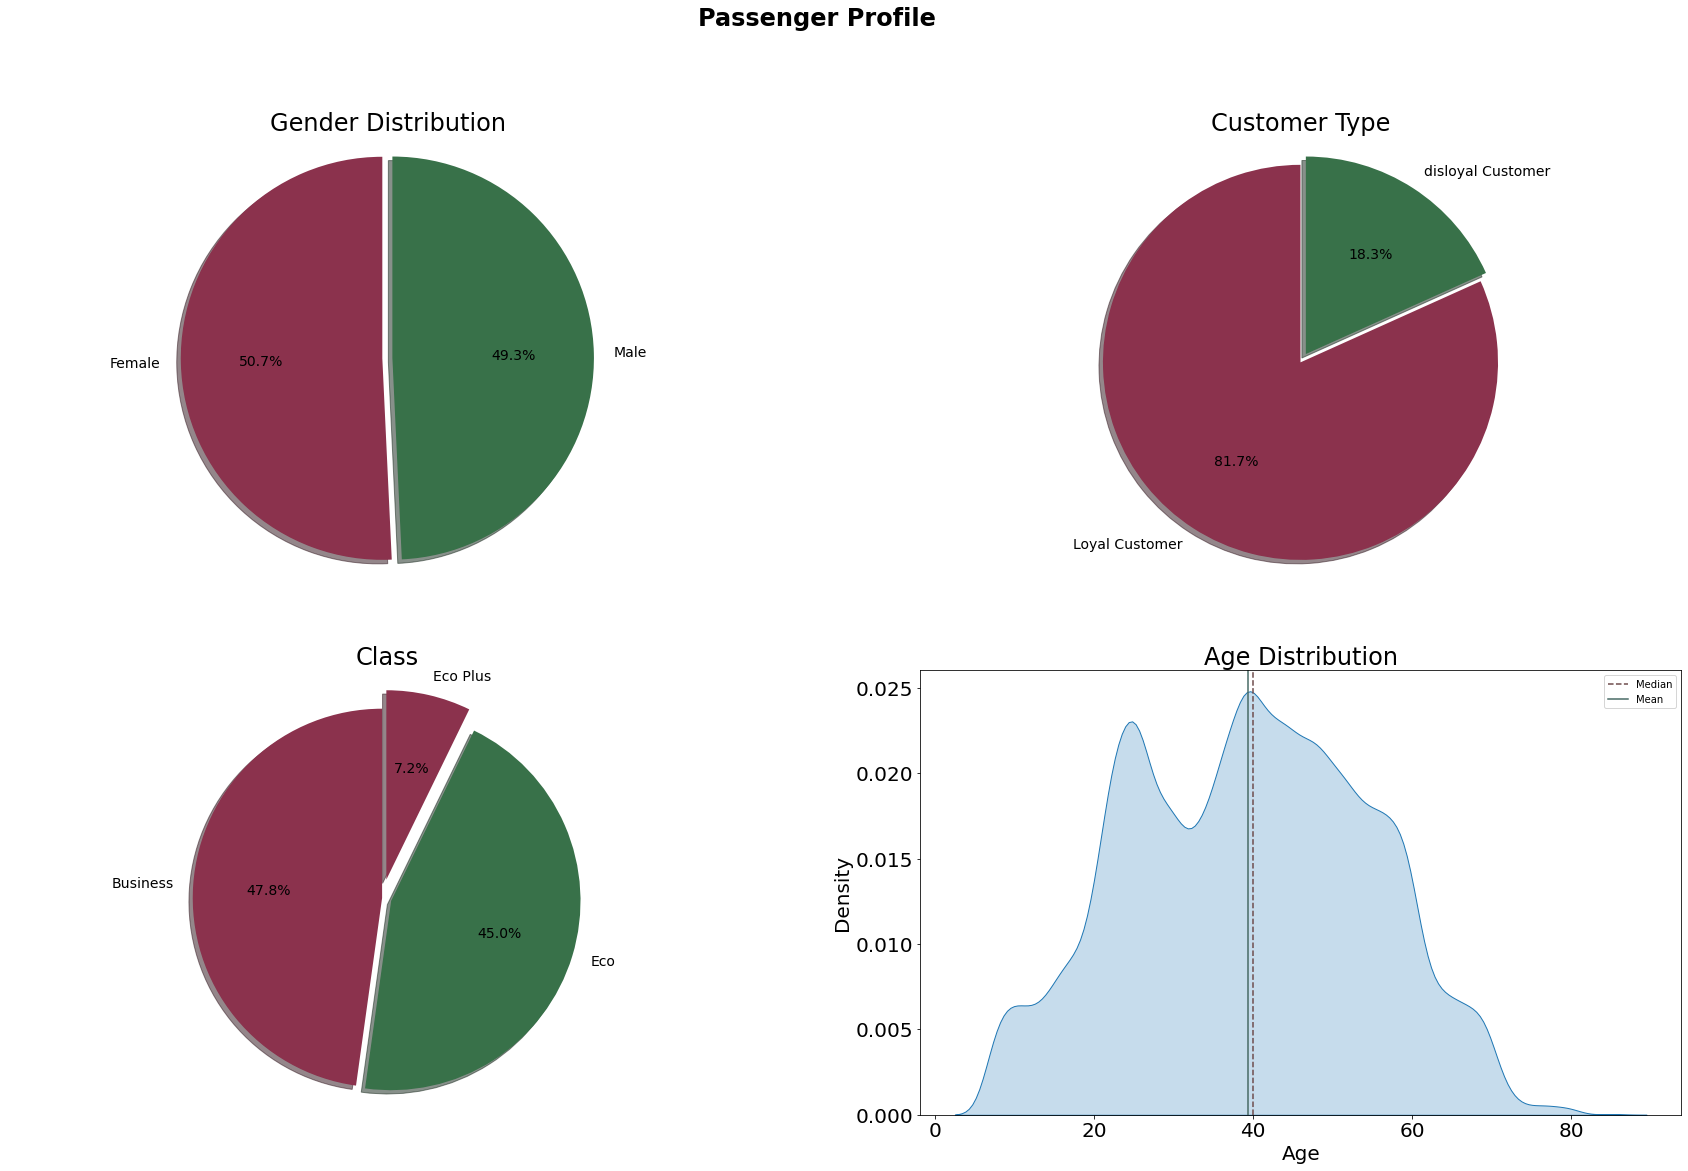

In [4]:
#define figure
fig=plt.figure(figsize=(30,18))
#set the title chart
plt.suptitle('Passenger Profile',fontsize=24,fontname='moonspace',weight='bold')
#create grid, divide in rows and columns
grid=gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
#add first figure with grid location
ax0=fig.add_subplot(grid[0,0:1])
#add title of your figure here
ax0.set_title('Gender Distribution',fontsize=24)
#set explode based on classes in case of pie chart, it makes your pie chart attractive 
explode=(0,0.05)
#define first values and then labels of columns
ax0.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,
        colors=target_colors,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90,textprops=pie_text)
#set the axis in equal way
ax0.axis('equal')
#repeat same step for below figure as well
ax1=fig.add_subplot(grid[0,1:])
ax1.set_title('Customer Type',fontsize=24)
explode=(0,0.05)
ax1.pie(df['Customer Type'].value_counts().values,labels=df['Customer Type'].value_counts().index,
        colors=target_colors,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90,textprops=pie_text)
ax1.axis('equal')
ax2=fig.add_subplot(grid[1,0:1])
ax2.set_title('Class',fontsize=24)
explode=(0,0.05,0.1)
ax2.pie(df['Class'].value_counts().values,labels=df['Class'].value_counts().index,
        colors=target_colors,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90,textprops=pie_text)
ax2.axis('equal')

ax3=fig.add_subplot(grid[1,1:])
ax3.set_title('Age Distribution',fontsize=24)
sns.kdeplot(df['Age'],ax=ax3,fill=True)
ax3.set_xlabel('Age',fontsize=20)
ax3.set_ylabel('Density',fontsize=20)
#add vertical line to plot mean, median
ax3.axvline(df['Age'].median(),linestyle = '--', color = "#6d4b4b",label='Median')
ax3.axvline(df['Age'].mean(),linestyle = 'solid', color = "#466964",label='Mean')
ax3.legend()
# change the fontsize
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()

1. Depicts the data across gender distribution is approimately balanced data set. 50.7% of female and 49.3 % of male data involved for the analysis.
2. Overall we have more loyal customer data in this survey.
3. Look like more people are travelling in business class compared to economic class.
4. All kind of age people ae participating in the survey but people of age near 25 and 40 years are travelling more.

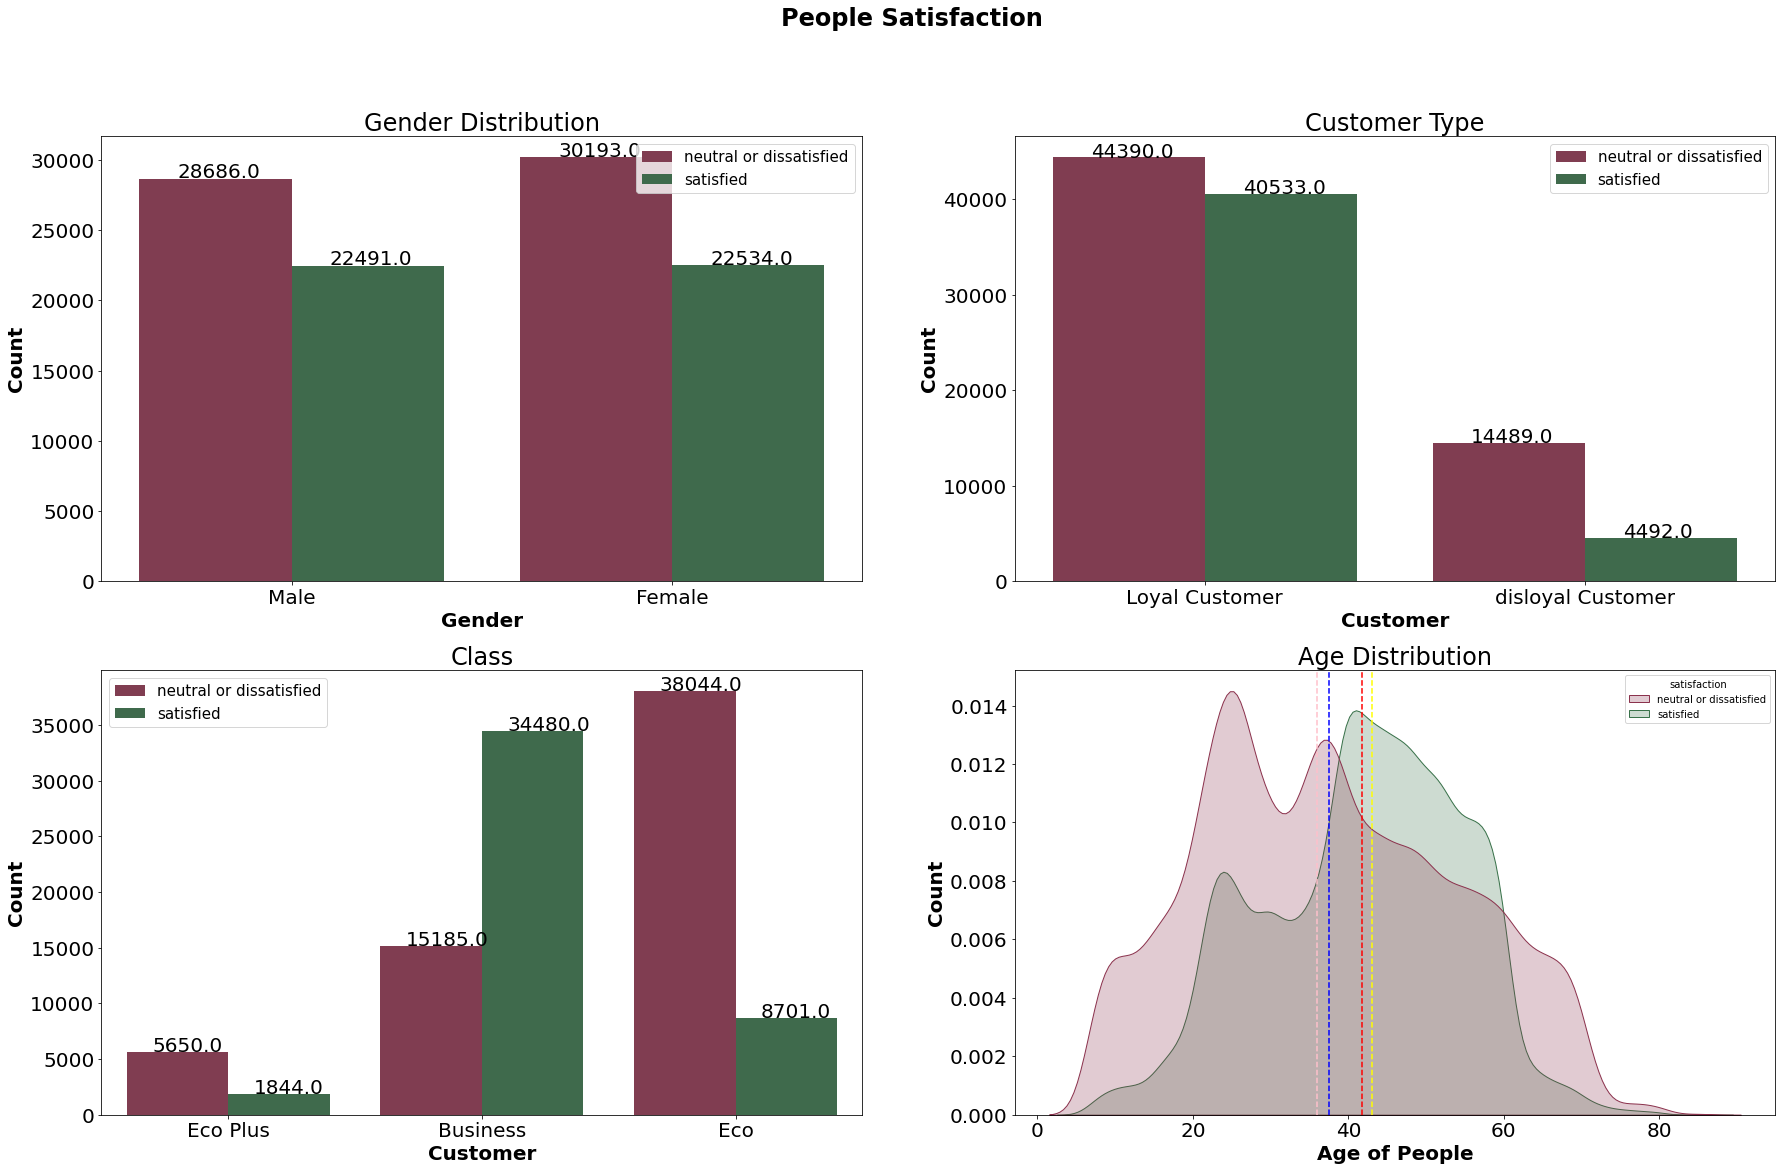

In [5]:
#create a dashboard of People Satisfaction level
fig=plt.figure(figsize=(30,18))
plt.suptitle('People Satisfaction',fontsize=24,fontname='moonspace',weight='bold')
grid=gridspec.GridSpec(ncols=2,nrows=2,figure=fig)
ax0=fig.add_subplot(grid[0,0:1])
ax0.set_title('Gender Distribution',fontsize=24)
sns.countplot(x=df['Gender'],hue=df['satisfaction'],ax=ax0,palette=target_colors)
# change the fontsize
ax0.tick_params(axis='x', labelsize=20)
ax0.tick_params(axis='y', labelsize=20)
ax0.legend(fontsize=15)
ax0.set_xlabel('Gender',fontsize=20,weight='bold')
ax0.set_ylabel('Count',fontsize=20,weight='bold')
for p in ax0.patches:
        ax0.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=20)
        
ax1=fig.add_subplot(grid[0,1:])
ax1.set_title('Customer Type',fontsize=24)
sns.countplot(x=df['Customer Type'],hue=df['satisfaction'],ax=ax1,palette=target_colors)
# change the fontsize
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize=15)
ax1.set_xlabel('Customer',fontsize=20,weight='bold')
ax1.set_ylabel('Count',fontsize=20,weight='bold')
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=20)
        
        
        
ax2=fig.add_subplot(grid[1,0:1])
ax2.set_title('Class',fontsize=24)
sns.countplot(x=df['Class'],hue=df['satisfaction'],ax=ax2,palette=target_colors)
# change the fontsize
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.legend(fontsize=15)
ax2.set_xlabel('Customer',fontsize=20,weight='bold')
ax2.set_ylabel('Count',fontsize=20,weight='bold')
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=20)

        
ax3=fig.add_subplot(grid[1,1:])
ax3.set_title('Age Distribution',fontsize=24)
sns.kdeplot(df['Age'],hue=df['satisfaction'],ax=ax3,fill=True,cumulative=False,palette=target_colors)
# change the fontsize
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)

ax3.set_xlabel('Age of People',fontsize=20,weight='bold')
ax3.set_ylabel('Count',fontsize=20,weight='bold')
ax3.axvline(df[df['satisfaction']=='satisfied']['Age'].mean(), linestyle = '--', color = 'r')
ax3.axvline(df[df['satisfaction']=='neutral or dissatisfied']['Age'].mean(), linestyle = '--', color = 'b')

ax3.axvline(df[df['satisfaction']=='satisfied']['Age'].median(), linestyle = '--', color = 'yellow')
ax3.axvline(df[df['satisfaction']=='neutral or dissatisfied']['Age'].median(), linestyle = '--', color = 'pink')

plt.show()

In [6]:
#let's analyze the numerical columns.
num_cols=df.select_dtypes(include=['int']).columns[3:]
num_cols

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

In [7]:
df_copy=df.copy()
nominal_dict={5:'Excellant',
             4:'Very Good',
             3:'Good',
             2:'Bad',
             1:'Very Bad',
             0:'Not reported'}

color_dict={'Excellant':'#1b85b8',
           'Very Good':'#5a5255',
           'Good':'#559e83',
           'Bad':'#ae5a41',
           'Very Bad':'#c3cb71',
           'Not reported':'grey'}

df_copy['Ease of Online booking']=df_copy['Ease of Online booking'].map(nominal_dict)
#df_copy['color']=df_copy['color'].map(color_dict)
new_df=pd.DataFrame(df_copy['Ease of Online booking'].value_counts(),columns=['Ease of Online booking'])
new_df['percentage']=(new_df['Ease of Online booking']/new_df['Ease of Online booking'].sum())*100
new_df['color']=new_df.index.map(color_dict)

In [8]:
new_df

,Ease of Online booking,percentage,color
Good,24449,23.530374,#559e83
Bad,24021,23.118455,#ae5a41
Very Good,19571,18.835656,#5a5255
Very Bad,17525,16.866531,#c3cb71
Excellant,13851,13.330574,#1b85b8
Not reported,4487,4.318409,grey


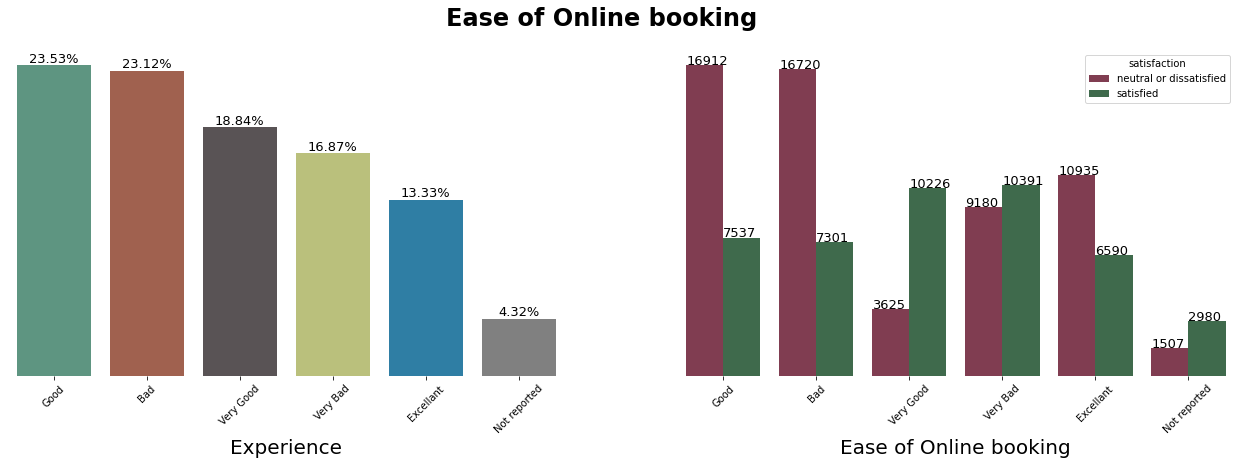

In [9]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(22,6))
plt.suptitle('Ease of Online booking',fontsize=24,fontname='moonspace',weight='bold')
plt.subplots_adjust(hspace = 0.9)
sns.barplot(data=new_df, x=new_df.index, y='percentage',ax=ax1,palette=list(new_df.color.values))
sns.countplot(data=df_copy, x='Ease of Online booking',hue='satisfaction',ax=ax2,palette=target_colors)
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50),fontsize=13)

    
for index,value in enumerate(new_df['percentage']):
    ax1.annotate(str(round(value,2))+'%',xy=(index,value+0.5),ha="center",va="center",fontsize=13)
        
ax1.set_xticklabels(new_df.index, rotation = 45)
ax1.set_xlabel('Experience',fontsize=20)
ax1.get_yaxis().set_visible(False)

ax2.set_xlabel('Ease of Online booking',fontsize=20)
ax2.set_xticklabels(new_df.index, rotation = 45)
ax2.get_yaxis().set_visible(False)
for spine1,spine2 in zip(ax1.spines.values(),ax2.spines.values()):
    spine1.set_visible(False)
    spine2.set_visible(False)

plt.show()

Let's Plot all the variables

In [10]:
#we make a duplicate of dataframe to plot the numerical columns
df_copy=df.copy()
nominal_dict={5:'Excellant',
             4:'Very Good',
             3:'Good',
             2:'Bad',
             1:'Very Bad',
             0:'Not reported'}
color_dict={'Excellant':'#1b85b8',
           'Very Good':'#5a5255',
           'Good':'#559e83',
           'Bad':'#ae5a41',
           'Very Bad':'#c3cb71',
           'Not reported':'grey'}


def CalculatePercentage(col):
    df_copy[col]=df_copy[col].map(nominal_dict)
    new_df=pd.DataFrame(df_copy[col].value_counts(),columns=[col])
    new_df['percentage']=(new_df[col]/new_df[col].sum())*100
    new_df['color']=new_df.index.map(color_dict)
    return new_df

def Visualize_numeric_col(col):
    df_per=CalculatePercentage(col)
    #df_copy[col]=df_copy[col].map(nominal_dict)
    
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(22,6))
    plt.suptitle(col,fontsize=24,fontname='moonspace',weight='bold')
    plt.subplots_adjust(hspace = 0.9)
    sns.barplot(data=df_per, x=df_per.index, y='percentage',ax=ax1,palette=list(df_per.color.values))
    sns.countplot(data=df_copy, x=col,hue='satisfaction',ax=ax2,palette=target_colors)
    for p in ax2.patches:
            ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50),fontsize=13)


    for index,value in enumerate(df_per['percentage']):
        ax1.annotate(str(round(value,2))+'%',xy=(index,value+0.5),ha="center",va="center",fontsize=13)

    ax1.set_xticklabels(df_per.index, rotation = 45)
    ax1.set_xlabel('Experience',fontsize=20)
    ax1.get_yaxis().set_visible(False)

    ax2.set_xlabel(col,fontsize=20)
    ax2.set_xticklabels(df_per.index, rotation = 45)
    ax2.get_yaxis().set_visible(False)
    for spine1,spine2 in zip(ax1.spines.values(),ax2.spines.values()):
        spine1.set_visible(False)
        spine2.set_visible(False)

    plt.show()

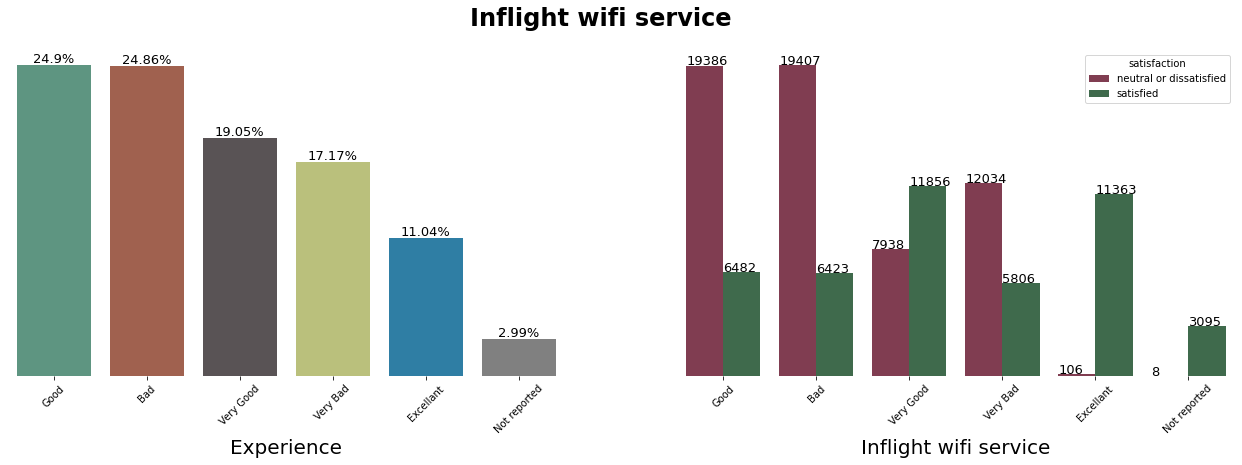

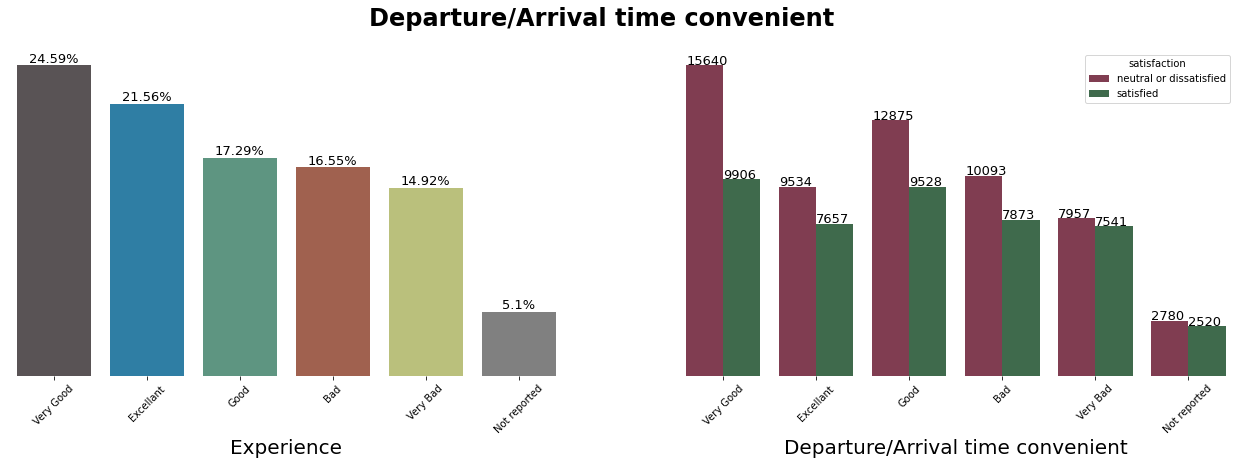

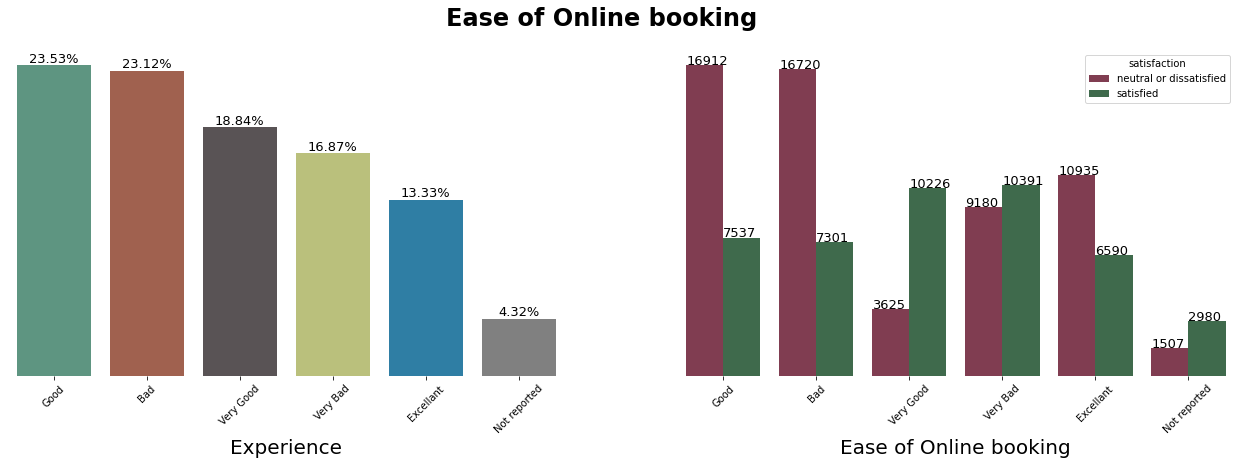

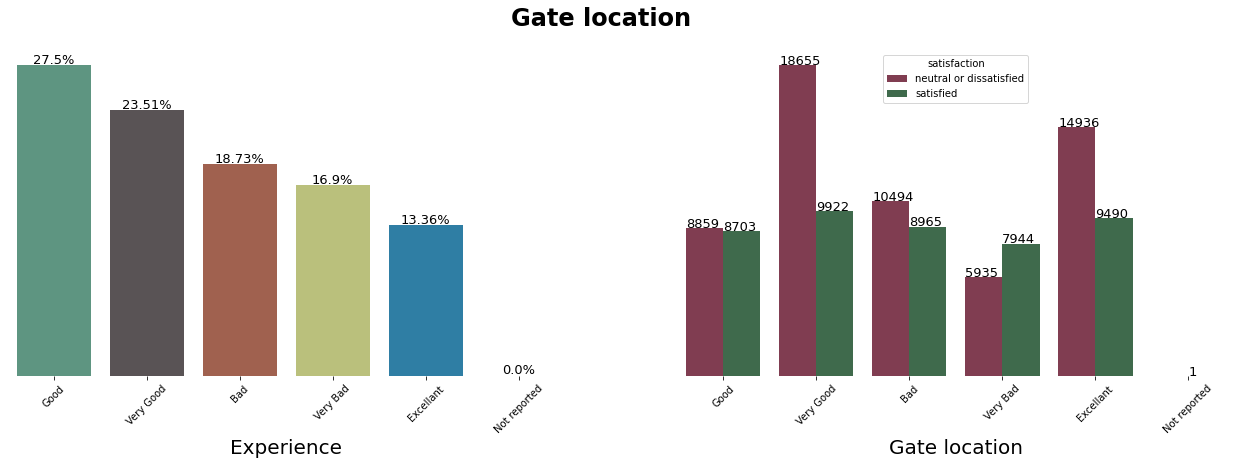

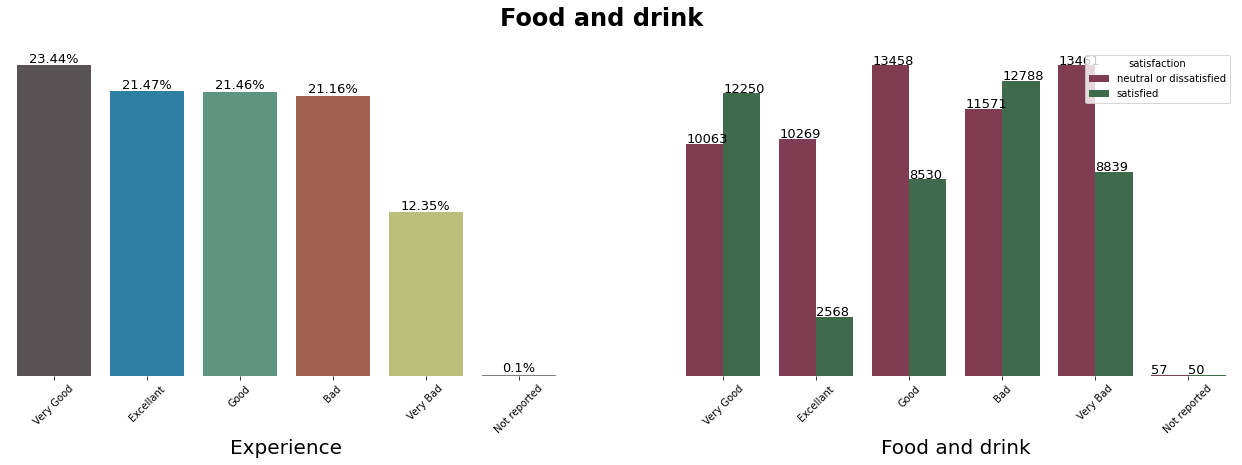

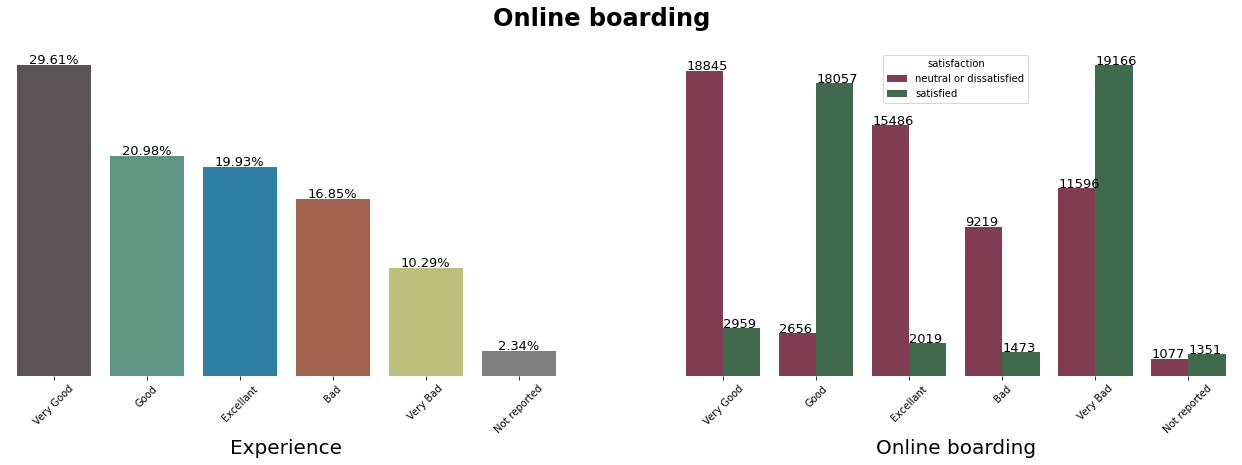

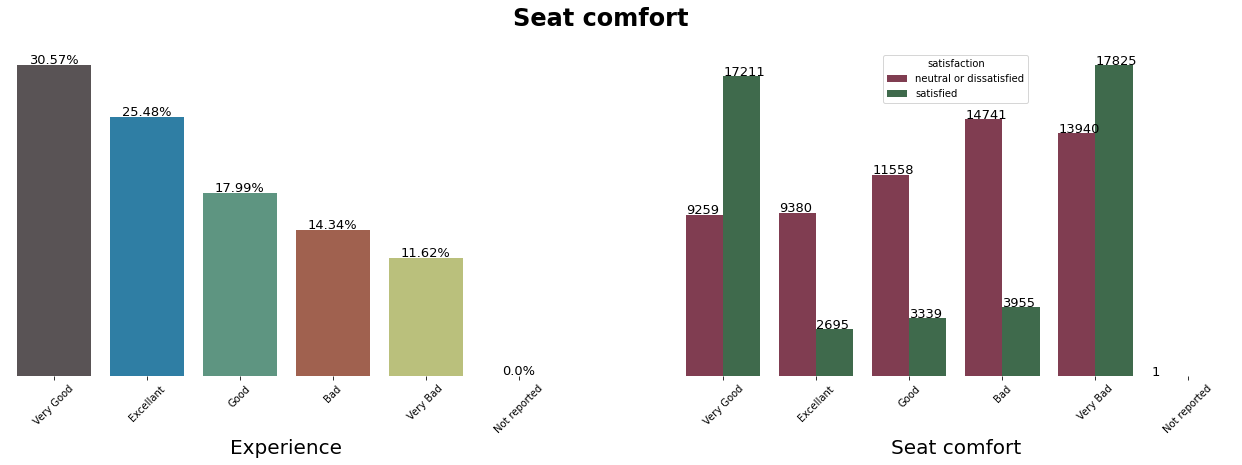

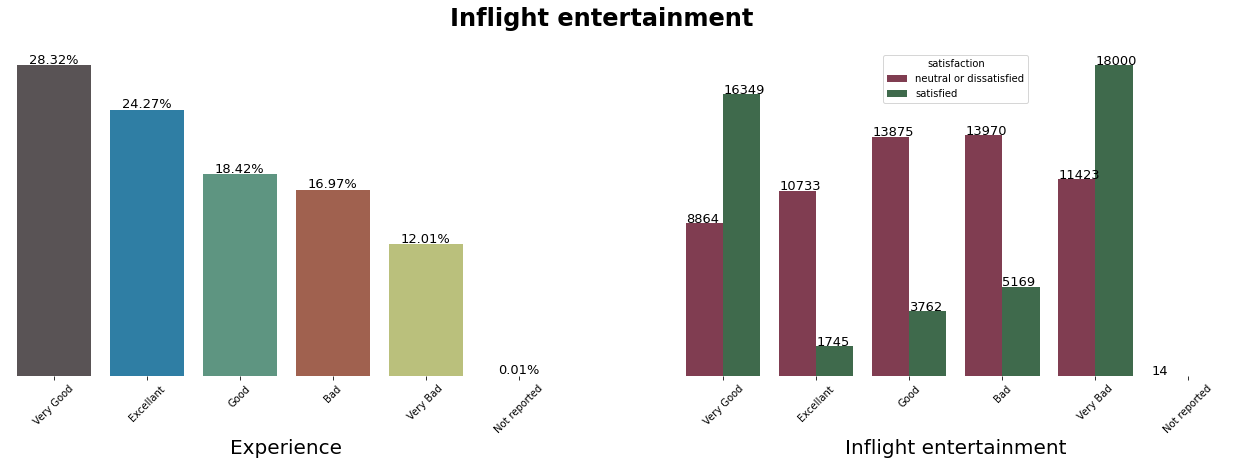

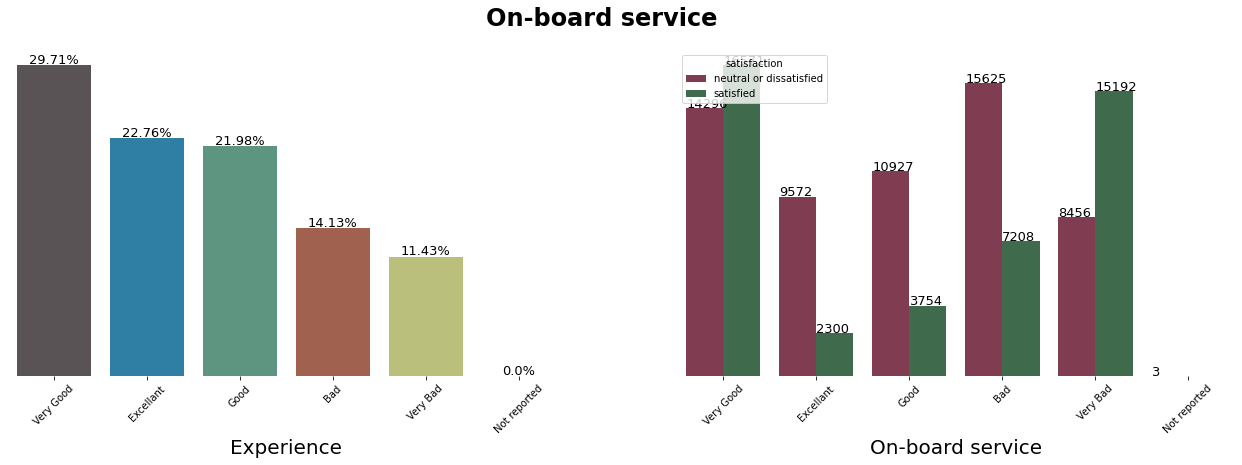

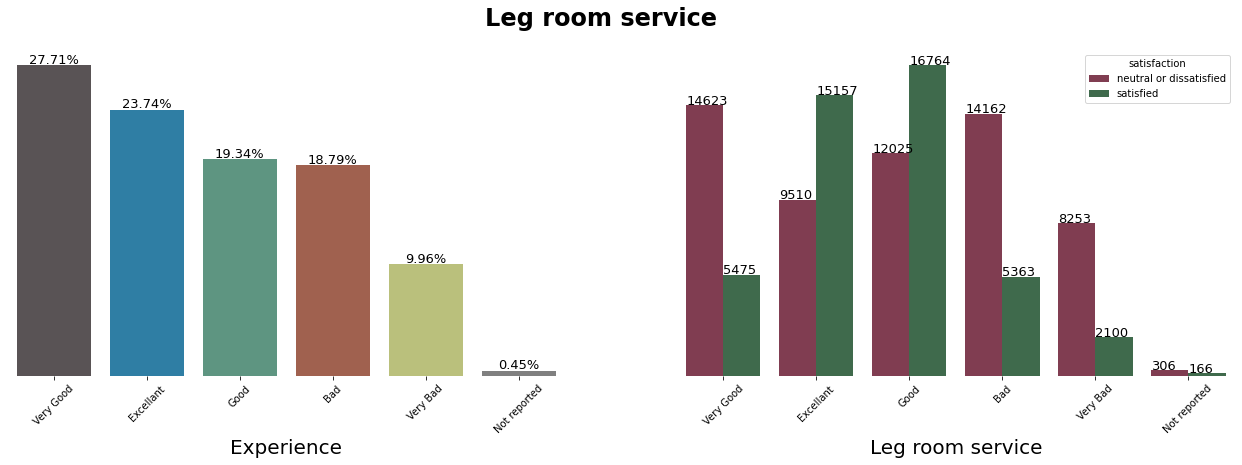

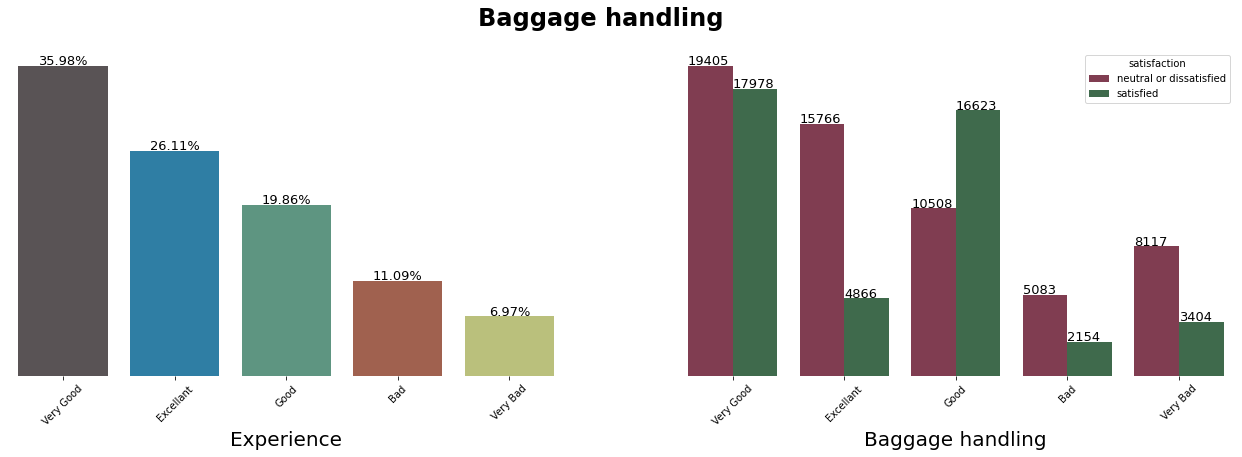

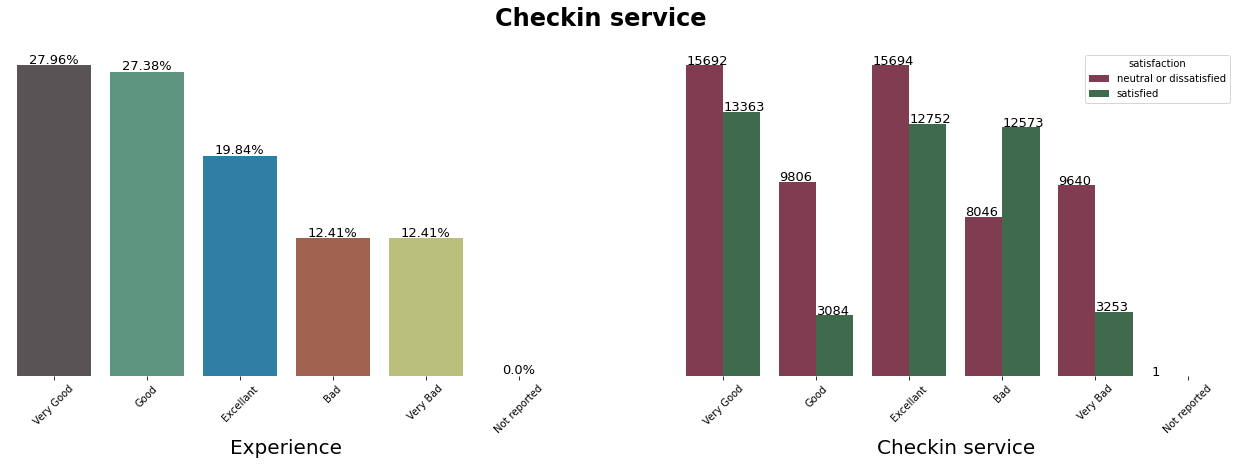

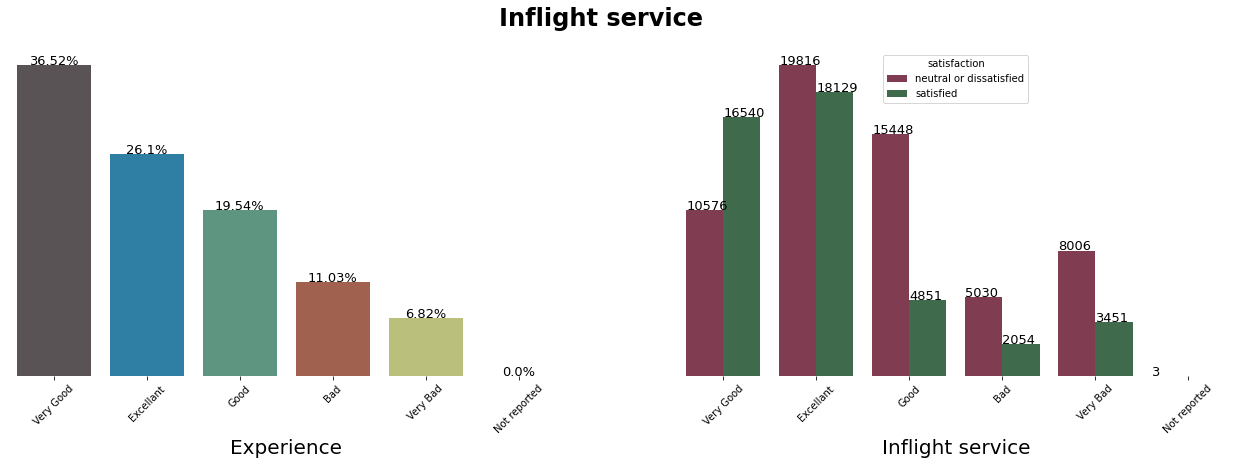

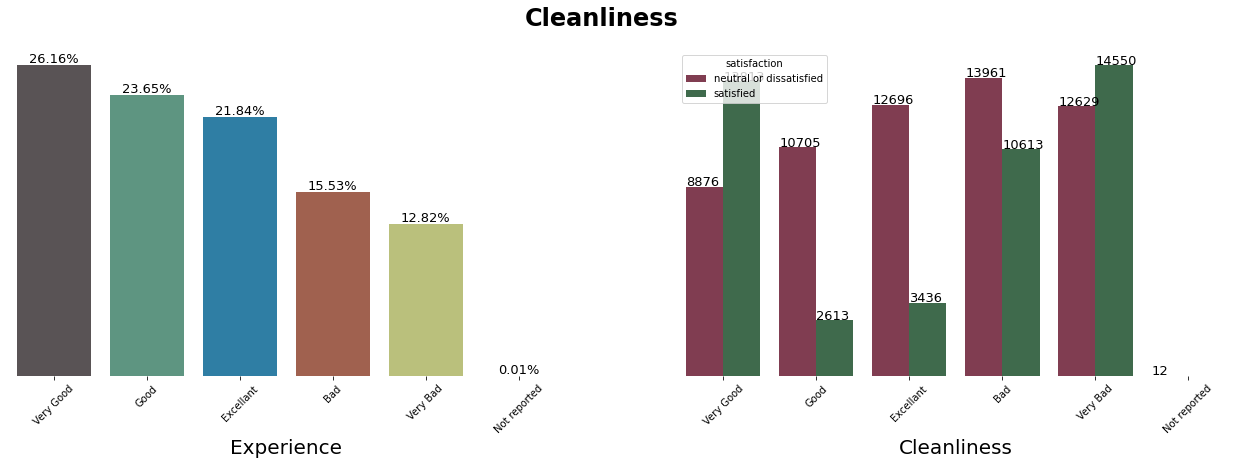

In [11]:
for ser in ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']:
    Visualize_numeric_col(ser)

In [12]:
iqr=np.percentile(df['Flight Distance'],75)-np.percentile(df['Flight Distance'],25)
lower_bound=np.percentile(df['Flight Distance'],25)-(1.5*iqr)
upper_bound=np.percentile(df['Flight Distance'],75)+(1.5*iqr)
print(lower_bound,upper_bound)

-1579.5 3736.5


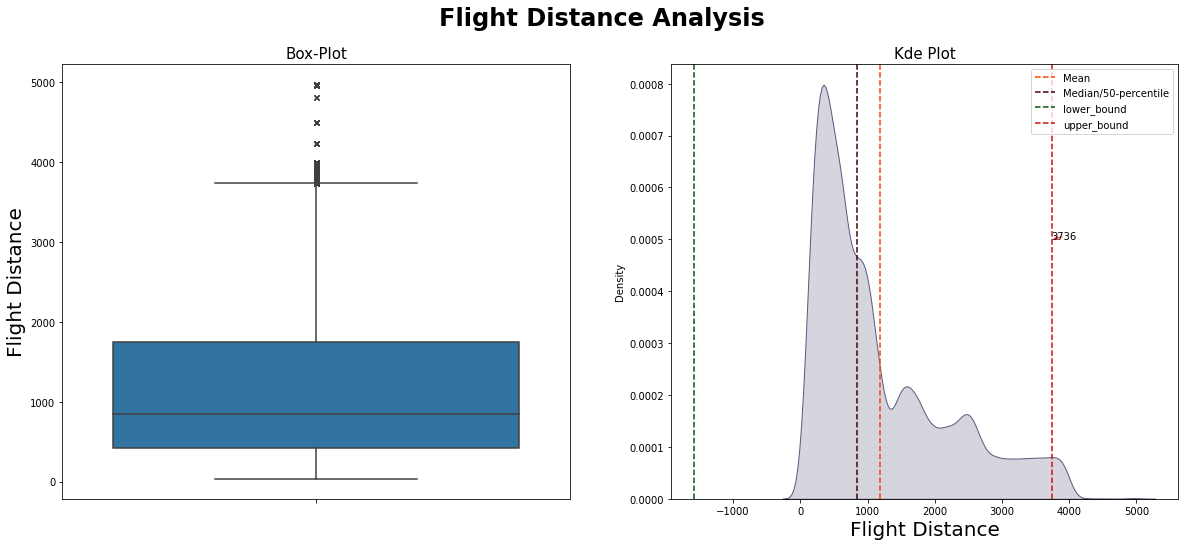

In [13]:
#Now we are going to perform our analysis basd on these features and also we are going to remove outliers if any.
#'Flight Distance'
#'Departure Delay in Minutes'
#'Arrival Delay in Minutes'

#Flight Distance: is the istance which we travelled in flight and it can be important factor to decide the satisfaction level.
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
plt.suptitle('Flight Distance Analysis',fontsize=24,weight='bold')
ax1.set_title('Box-Plot',fontsize=15)
sns.boxplot(y='Flight Distance',data=df,ax=ax1,flierprops={"marker": "x"})
#ax1.set_xticklabels(df_per.index, rotation = 45)
ax1.set_ylabel('Flight Distance',fontsize=20)

ax2.set_title('Kde Plot',fontsize=15)
sns.kdeplot('Flight Distance',data=df,ax=ax2,shade=True,color='#5e597e')
ax2.axvline(df['Flight Distance'].mean(), linestyle = '--', color = '#ff4000',label='Mean')
ax2.axvline(df['Flight Distance'].median(), linestyle = '--', color = '#40000a',label='Median/50-percentile')
ax2.axvline(lower_bound, linestyle = '--', color = '#06550e',label='lower_bound')
ax2.axvline(upper_bound, linestyle = '--', color = '#cc1111',label='upper_bound')
ax2.legend()
ax2.set_xlabel('Flight Distance',fontsize=20)
ax2.annotate(f'{upper_bound:.0f}', xy=(upper_bound, 0.0005), arrowprops=dict(arrowstyle="->", color='r', alpha=.8))
plt.show()

In [14]:
def Perentile_Firststep(data,col,start,end,jump):
    # values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
    for i in range(start,end,jump):
        var =data[col].values
        var = np.sort(var,axis = None)
        print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ",var[-1])
    
Perentile_Firststep(df,'Flight Distance',0,100,10)
    

0 percentile value is 31
10 percentile value is 236
20 percentile value is 358
30 percentile value is 482
40 percentile value is 630
50 percentile value is 843
60 percentile value is 1050
70 percentile value is 1513
80 percentile value is 2065
90 percentile value is 2750
100 percentile value is  4983


In [15]:
Perentile_Firststep(df,'Flight Distance',90,100,1)

90 percentile value is 2750
91 percentile value is 2871
92 percentile value is 2994
93 percentile value is 3129
94 percentile value is 3256
95 percentile value is 3383
96 percentile value is 3510
97 percentile value is 3635
98 percentile value is 3762
99 percentile value is 3882
100 percentile value is  4983


In [16]:
def Perentile_nextstep(data,col):
    for i in np.arange(0.0, 1.0, 0.1):
        var =data[col].values
        var = np.sort(var,axis = None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ",var[-1])
Perentile_nextstep(df,'Flight Distance')

99.0 percentile value is 3882
99.1 percentile value is 3893
99.2 percentile value is 3905
99.3 percentile value is 3919
99.4 percentile value is 3931
99.5 percentile value is 3943
99.6 percentile value is 3955
99.7 percentile value is 3968
99.8 percentile value is 3982
99.9 percentile value is 3995
100 percentile value is  4983


In [17]:
#so to remove outliers from this column we can select a flight distance which are less than 3995.
df[df['Flight Distance']>3995]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
994,994,59271,Female,Loyal Customer,26,Business travel,Business,4243,2,2,...,3,5,4,4,4,5,4,26,0.0,satisfied
2401,2401,59270,Female,Loyal Customer,25,Personal Travel,Eco,4963,2,5,...,5,3,4,4,2,3,2,0,0.0,neutral or dissatisfied
2847,2847,31870,Female,Loyal Customer,63,Personal Travel,Business,4983,0,5,...,3,2,4,3,1,5,1,3,0.0,satisfied
5903,5903,58704,Female,Loyal Customer,25,Business travel,Business,4243,4,5,...,3,2,3,4,4,4,4,4,0.0,neutral or dissatisfied
6617,6617,9824,Female,Loyal Customer,42,Business travel,Business,3996,2,3,...,2,2,2,2,1,2,2,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101612,101612,85227,Female,Loyal Customer,30,Business travel,Business,3998,3,3,...,4,4,4,1,2,1,4,0,0.0,satisfied
101664,101664,84499,Male,Loyal Customer,60,Personal Travel,Eco,4502,2,2,...,2,1,5,4,4,4,4,28,0.0,neutral or dissatisfied
102905,102905,21049,Female,Loyal Customer,36,Business travel,Business,3998,3,3,...,4,4,4,5,4,4,1,33,24.0,satisfied
102913,102913,58708,Male,Loyal Customer,33,Business travel,Eco Plus,4243,2,5,...,4,5,3,3,2,3,2,16,13.0,neutral or dissatisfied


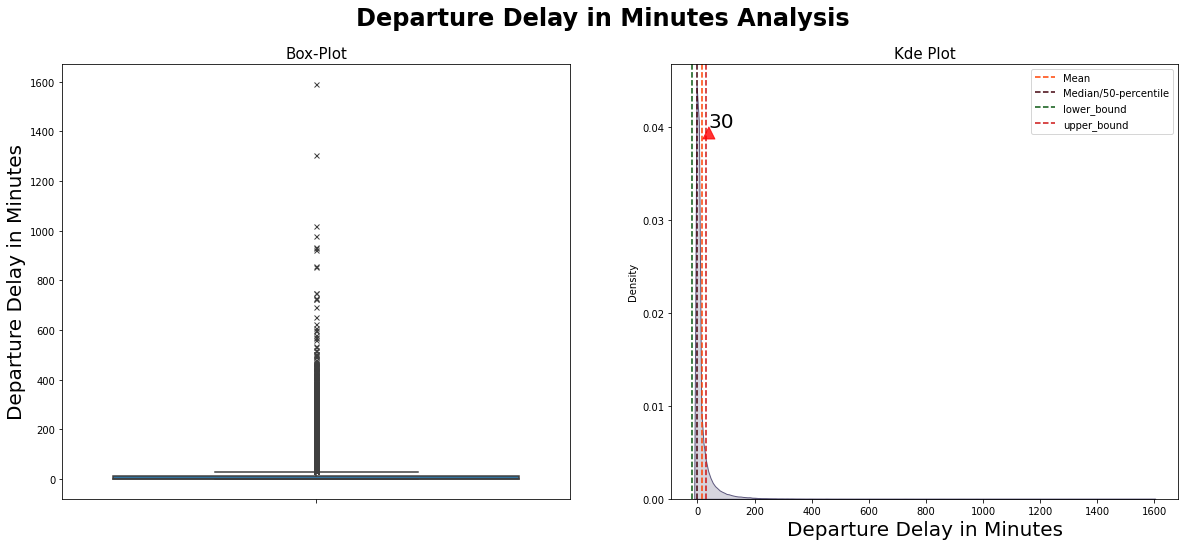

In [18]:
def OutlierDetection(data,col):
    iqr=np.percentile(data[col],75)-np.percentile(data[col],25)
    lower_bound=np.percentile(data[col],25)-(1.5*iqr)
    upper_bound=np.percentile(data[col],75)+(1.5*iqr)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))
    plt.suptitle(col+' Analysis',fontsize=24,weight='bold')
    ax1.set_title('Box-Plot',fontsize=15)
    sns.boxplot(y=col,data=data,ax=ax1,flierprops={"marker": "x"})
    #ax1.set_xticklabels(df_per.index, rotation = 45)
    ax1.set_ylabel(col,fontsize=20)
    #ax1.get_yaxis().set_visible(False)
    ax2.set_title('Kde Plot',fontsize=15)
    sns.kdeplot(col,data=data,ax=ax2,shade=True,color='#5e597e')
    ax2.axvline(df[col].mean(), linestyle = '--', color = '#ff4000',label='Mean')
    ax2.axvline(df[col].median(), linestyle = '--', color = '#40000a',label='Median/50-percentile')
    ax2.axvline(lower_bound, linestyle = '--', color = '#06550e',label='lower_bound')
    ax2.axvline(upper_bound, linestyle = '--', color = '#cc1111',label='upper_bound')
    ax2.legend()
    ax2.set_xlabel(col,fontsize=20)
    ax2.annotate(f'{upper_bound:.0f}', xy=(upper_bound+10, 0.04), arrowprops=dict(color='r', alpha=.8,),fontsize=20)
    #sns.violinplot(x='satisfaction',y='Flight Distance',data=df_copy,ax=ax2,palette=target_colors,hue='satisfaction')
    plt.show()
OutlierDetection(df,'Departure Delay in Minutes')

In [19]:
Perentile_Firststep(df,'Departure Delay in Minutes',90,100,1)

90 percentile value is 44
91 percentile value is 48
92 percentile value is 54
93 percentile value is 60
94 percentile value is 68
95 percentile value is 78
96 percentile value is 91
97 percentile value is 108
98 percentile value is 134
99 percentile value is 182
100 percentile value is  1592


In [20]:
Perentile_nextstep(df,'Departure Delay in Minutes')

99.0 percentile value is 182
99.1 percentile value is 187
99.2 percentile value is 196
99.3 percentile value is 204
99.4 percentile value is 215
99.5 percentile value is 233
99.6 percentile value is 253
99.7 percentile value is 279
99.8 percentile value is 315
99.9 percentile value is 376
100 percentile value is  1592


In [21]:
Perentile_Firststep(df,'Departure Delay in Minutes',90,100,1)

90 percentile value is 44
91 percentile value is 48
92 percentile value is 54
93 percentile value is 60
94 percentile value is 68
95 percentile value is 78
96 percentile value is 91
97 percentile value is 108
98 percentile value is 134
99 percentile value is 182
100 percentile value is  1592


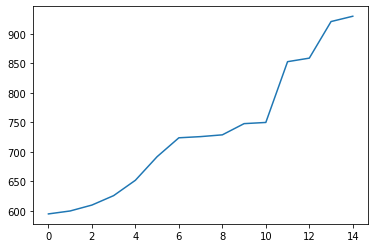

In [22]:
var =df['Departure Delay in Minutes'].values
var = np.sort(var,axis = None)
plt.plot(var[-20:-5])
plt.show()

In [23]:
#to remove outlier from departure delay time, we are considering the flights which have delay less than 750 mins
df[df['Departure Delay in Minutes']>750]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
27732,27732,69504,Male,Loyal Customer,27,Business travel,Business,1746,1,1,...,4,3,5,4,5,4,5,859,860.0,satisfied
51860,51860,79912,Male,Loyal Customer,15,Business travel,Business,3979,2,2,...,2,2,4,3,2,3,2,853,823.0,neutral or dissatisfied
61287,61287,4376,Female,Loyal Customer,53,Business travel,Business,2418,3,4,...,3,5,2,2,3,4,3,930,952.0,neutral or dissatisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
61528,61528,83676,Male,disloyal Customer,43,Business travel,Business,577,3,3,...,5,4,5,5,5,3,5,921,924.0,neutral or dissatisfied
72206,72206,78300,Male,Loyal Customer,30,Personal Travel,Eco,1598,1,4,...,5,3,4,4,1,4,1,978,970.0,neutral or dissatisfied
80182,80182,8345,Male,Loyal Customer,47,Business travel,Business,2187,4,5,...,5,4,5,5,4,4,4,933,920.0,satisfied
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


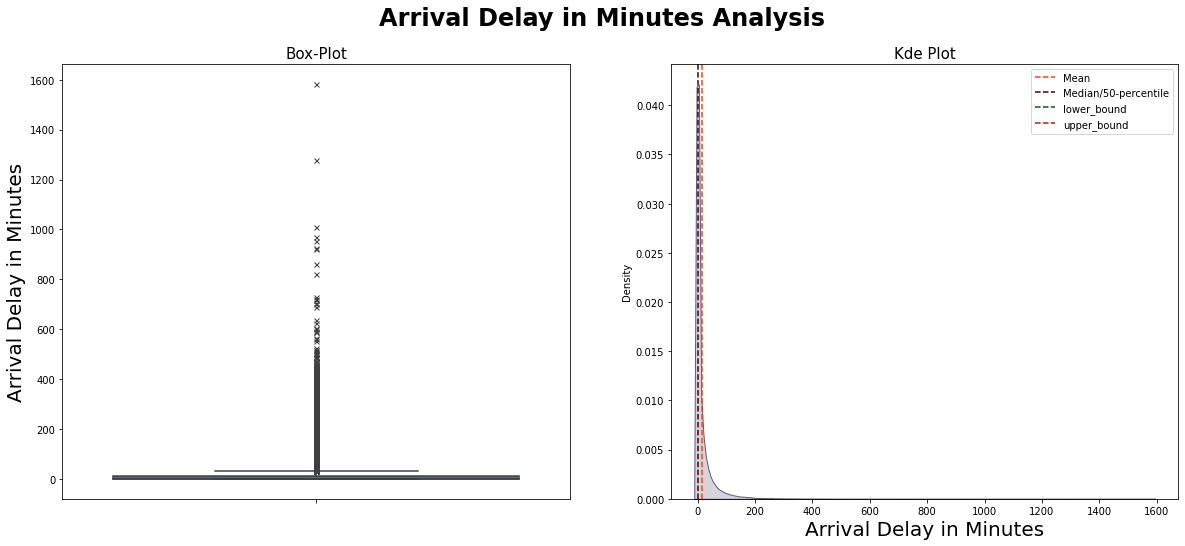

In [24]:
OutlierDetection(df,'Arrival Delay in Minutes')

In [25]:
Perentile_Firststep(df,'Arrival Delay in Minutes',90,100,1)

90 percentile value is 45.0
91 percentile value is 51.0
92 percentile value is 56.0
93 percentile value is 63.0
94 percentile value is 72.0
95 percentile value is 82.0
96 percentile value is 97.0
97 percentile value is 116.0
98 percentile value is 148.0
99 percentile value is 208.0
100 percentile value is  nan


In [26]:
Perentile_nextstep(df,'Arrival Delay in Minutes')

99.0 percentile value is 208.0
99.1 percentile value is 221.0
99.2 percentile value is 238.0
99.3 percentile value is 256.0
99.4 percentile value is 283.0
99.5 percentile value is 319.0
99.6 percentile value is 381.0
99.7 percentile value is 1280.0
99.8 percentile value is nan
99.9 percentile value is nan
100 percentile value is  nan


In [27]:
df[df['Arrival Delay in Minutes']>381]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1264,1264,91467,Female,disloyal Customer,26,Business travel,Eco,459,4,4,...,2,3,2,4,4,4,4,412,459.0,satisfied
2075,2075,91443,Male,Loyal Customer,32,Business travel,Business,859,5,5,...,3,3,5,5,4,3,4,435,470.0,satisfied
4596,4596,83874,Male,Loyal Customer,46,Business travel,Business,1670,1,1,...,4,3,3,5,5,5,5,480,471.0,satisfied
5056,5056,39675,Female,Loyal Customer,41,Business travel,Business,3517,1,1,...,5,3,2,4,4,5,4,438,438.0,satisfied
5209,5209,10100,Male,Loyal Customer,32,Personal Travel,Eco,961,1,5,...,3,5,5,5,5,3,5,472,446.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99233,99233,37895,Male,Loyal Customer,40,Business travel,Business,3577,3,1,...,3,3,3,3,3,2,3,480,471.0,neutral or dissatisfied
101041,101041,58081,Female,Loyal Customer,53,Business travel,Business,2480,4,4,...,2,3,3,3,4,2,4,394,392.0,neutral or dissatisfied
101096,101096,113935,Female,Loyal Customer,52,Business travel,Business,1838,1,1,...,5,3,4,5,4,3,4,151,385.0,satisfied
101171,101171,34870,Female,Loyal Customer,13,Business travel,Business,2248,1,4,...,1,5,2,3,1,4,1,400,393.0,neutral or dissatisfied


In [28]:
df['Arrival Delay in Minutes'].isna().sum()
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(), inplace=True)
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

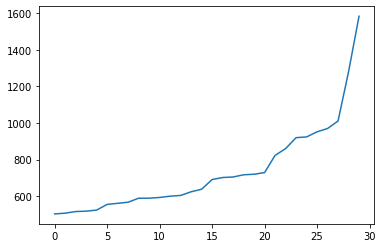

In [29]:
var =df['Arrival Delay in Minutes'].values[:-5]
var = np.sort(var,axis = None)
plt.plot(var[-30:])
plt.show()

In [30]:
#considered data which have arrival delay time less than 1000 mins
df[df['Arrival Delay in Minutes']>1000]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [31]:
def RemoveOutlier(data):
    
    #first let's us know how many rows are there in dataframe
    a=data.shape[0]
    print ("{} are the number of rows we have in our original dataframe".format(a))
    new_dataframe=data[(data['Flight Distance']<3995) & (data['Departure Delay in Minutes']<750) & (data['Arrival Delay in Minutes']<1000)]
    #store the rows of fillter dataframe
    b=new_dataframe.shape[0]
    #print the number of outliers
    print ("Number of outlier:",(a-b))
    print("Percentage of data removed:",100-(b/a)*100)
    return new_dataframe
df_final=RemoveOutlier(df)    

103904 are the number of rows we have in our original dataframe
Number of outlier: 115
Percentage of data removed: 0.11067908838928986


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103789 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103789 non-null  int64  
 1   id                                 103789 non-null  int64  
 2   Gender                             103789 non-null  object 
 3   Customer Type                      103789 non-null  object 
 4   Age                                103789 non-null  int64  
 5   Type of Travel                     103789 non-null  object 
 6   Class                              103789 non-null  object 
 7   Flight Distance                    103789 non-null  int64  
 8   Inflight wifi service              103789 non-null  int64  
 9   Departure/Arrival time convenient  103789 non-null  int64  
 10  Ease of Online booking             103789 non-null  int64  
 11  Gate location                      1037

# Correlation Analysis

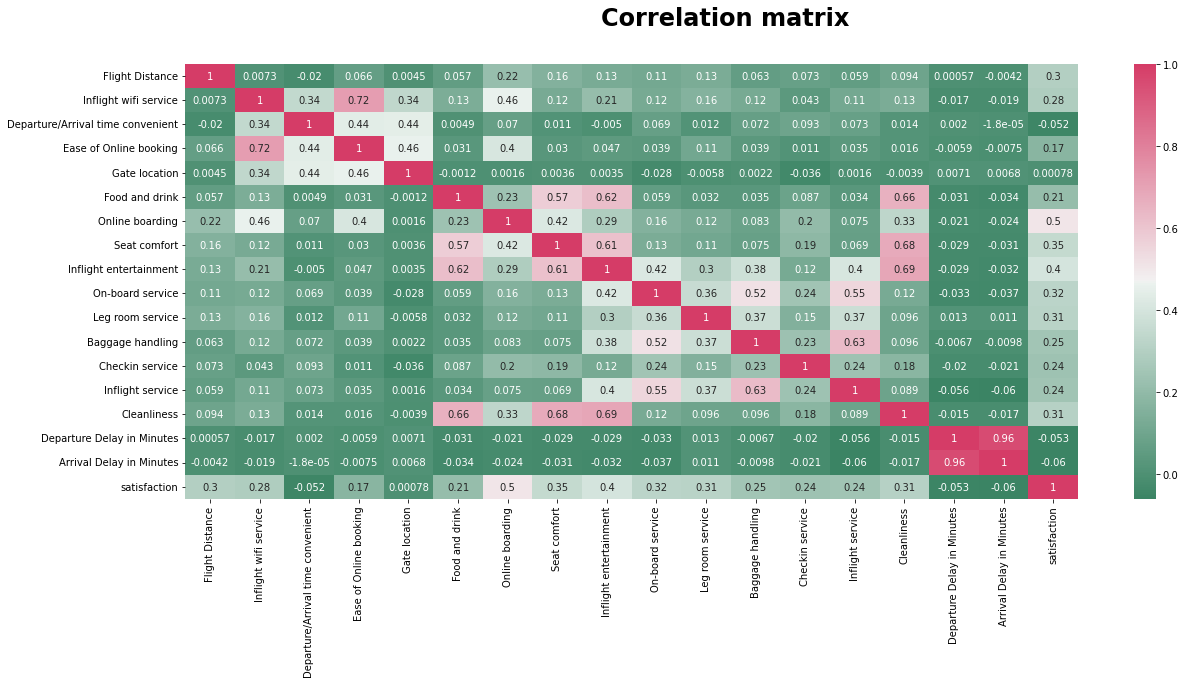

In [33]:
target_dict={'neutral or dissatisfied':0,
            'satisfied':1}
df_final['satisfaction']=df_final['satisfaction'].map(target_dict)

fig=plt.subplots(figsize=(20,8))
plt.suptitle('Correlation matrix',fontsize=24,fontname='moonspace',weight='bold')
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(df_final[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']].corr(),annot=True,cmap=cmap)

plt.show()

# Model Building:

In [34]:
df_final.select_dtypes(include=['object'])

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


In [35]:
from sklearn.preprocessing import LabelEncoder

label={}
for col in df_final.select_dtypes(include=['object']).columns:
    label[col]=LabelEncoder()
    df_final[col]=label[col].fit_transform(df_final[col])

In [36]:
df_final=df_final.iloc[:,2:]
df_final.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Split the Data Set:

In [37]:
from sklearn.model_selection import train_test_split
X=df_final.loc[:,:'Arrival Delay in Minutes']
y=df_final['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(72652, 22) (72652,)
(31137, 22) (31137,)


In [38]:
#let's standardize the data to convert in one scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic Regression with Hyperparameter Tuning

# Grid Search

- In Grid search, we are defining parameter grid, where we include a set of hyperparameter values that can be use to build model.
- Hyperparamters are in the matrix structure and then model is trained on every combination.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#defining here the hyperparamters for logistic regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],#C is the hyperarameter which help us to do regularization
                                              # C is inversely proportional to lambda.
    'penalty': ['l2'], #we have two types of regularization
    'max_iter': list(range(100,800,1000)),
    'random_state':[0],
    
}
#calling the object
logistic= LogisticRegression()
#applying the gridsearch
grid = GridSearchCV(logistic,param_grid=logistic_param_grid ,cv=3,scoring='accuracy')
#fitting on the training data
model_grid = grid.fit(X_train,y_train)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

Best grid search hyperparameters are: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}
Best grid search score is: 0.8771953977579638


In [40]:
#now by using the best model results we are checcking the cross
from sklearn.metrics import accuracy_score
y_pred=model_grid.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

print('Check the accuracy of model', accuracy_score(y_pred, y_test))

(31137,)
(31137,)
Check the accuracy of model 0.8718245174551177


# Random Search:

- In Random search, inplace of providing the hyperparamters in list we just replaced it from the distribution.So it just asked the distribution for parameters.

In [41]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

# random search cv
logistic_random_param={'C':loguniform(1e-4, 1e0),
          'max_iter': (np.arange(100,800,10))}


#calling the object
logistic_random= LogisticRegression()
#applying the gridsearch
grid = RandomizedSearchCV(logistic_random,param_distributions=logistic_random_param ,cv=3,scoring='accuracy')
#fitting on the training data
model_grid = grid.fit(X_train,y_train)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str((round(model_grid.best_score_,2))))



Best grid search hyperparameters are: {'C': 0.848150206818869, 'max_iter': 340}
Best grid search score is: 0.88


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
y_pred=model_grid.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

print('Check the accuracy of model', round(accuracy_score(y_pred, y_test)*100,2))

(31137,)
(31137,)
Check the accuracy of model 87.18


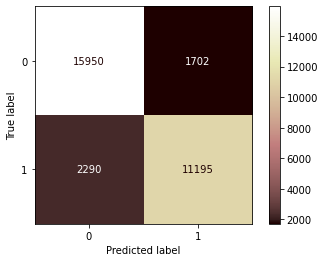

In [43]:
plot_confusion_matrix(model_grid, X_test, y_test,cmap=plt.cm.pink,xticks_rotation='horizontal')
plt.show()

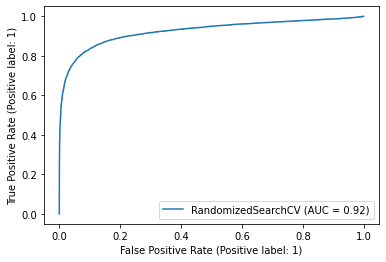

In [44]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
roc_auc = roc_auc_score(y_test, y_pred) 
plot_roc_curve(model_grid, X_test, y_test)  
plt.show()

1. An excellent model has AUC near to the 1 which means it has a good measure of separability.
2. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.